## 1. Importing Libraries

In [4]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Importing warnings
import warnings
warnings.filterwarnings('ignore')

## 2. Importing datasets

In [6]:
# Importing Dataset
df = pd.read_csv(r'D:\ML\Kaggle\Binary_Classification_of_Insurance_Cross_Selling\train.csv')

# Verify
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,Male,21,1,35.0,0,1-2 Year,Yes,65101.0,124.0,187,0
1,1,Male,43,1,28.0,0,> 2 Years,Yes,58911.0,26.0,288,1
2,2,Female,25,1,14.0,1,< 1 Year,No,38043.0,152.0,254,0
3,3,Female,35,1,1.0,0,1-2 Year,Yes,2630.0,156.0,76,0
4,4,Female,36,1,15.0,1,1-2 Year,No,31951.0,152.0,294,0


## 3. Data Understanding

####  About the Dataset:   
The dataset (both train and test) was generated from a deep learning model trained on the Health Insurance Cross Sell Prediction Data dataset. Feature distributions are close to, but not exactly the same, as the original. 

#### Objective:  
The objective of this competition is to predict which customers respond positively to an automobile insurance offer.

#### Column Definitions
1. **id:** Unique identifier for each record .
2. **Gender:** The gender of the individual (e.g., Male, Female).
3. **Age:** The age of the individual.
4. **Driving_License:** Indicates whether the individual has a driving license (e.g., 1 for yes, 0 for no).
5. **Region_Code:** Code representing the region where the individual is located.
6. **Previously_Insured:** Indicates whether the individual was previously insured (e.g., 1 for yes, 0 for no).
7. **Vehicle_Age:** The age of the vehicle (e.g., 1-2 years, 2-3 years, 3+ years).
8. **Vehicle_Damage:** Indicates if the vehicle has previously been damaged (e.g., 1 for yes, 0 for no).
9. **Annual_Premium:** The annual premium amount paid for the insurance policy.
10. **Policy_Sales_Channel:** The sales channel through which the policy was sold.
11. **Vintage:** The number of days since the customer first contacted the company.
12. **Response:** Target variable indicating whether the customer responded to the insurance offer (e.g., 1 for yes, 0 for no).

In [7]:
# Viewing data size
df.shape

(11504798, 12)

In [8]:
# since the data is huge, let us set the simple format
pd.set_option('display.float_format', '{:.2f}'.format)

# Viewing data description
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,11504798.00,11504798.00,11504798.00,11504798.00,11504798.00,11504798.00,11504798.00,11504798.00,11504798.00
mean,5752398.50,38.38,1.00,26.42,0.46,30461.37,112.43,163.90,0.12
std,3321149.26,14.99,0.04,12.99,0.50,16454.75,54.04,79.98,0.33
min,0.00,20.00,0.00,0.00,0.00,2630.00,1.00,10.00,0.00
25%,2876199.25,24.00,1.00,15.00,0.00,25277.00,29.00,99.00,0.00
50%,5752398.50,36.00,1.00,28.00,0.00,31824.00,151.00,166.00,0.00
75%,8628597.75,49.00,1.00,35.00,1.00,39451.00,152.00,232.00,0.00
max,11504797.00,85.00,1.00,52.00,1.00,540165.00,163.00,299.00,1.00


## 4. Data Cleaning

In [9]:
# Viewing null values
df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

From the above we can understand, that the dataset does not have any missing values. Let's proceed with Exploratory Data Analysis (EDA).

## 5. Exploratory Data Analysis

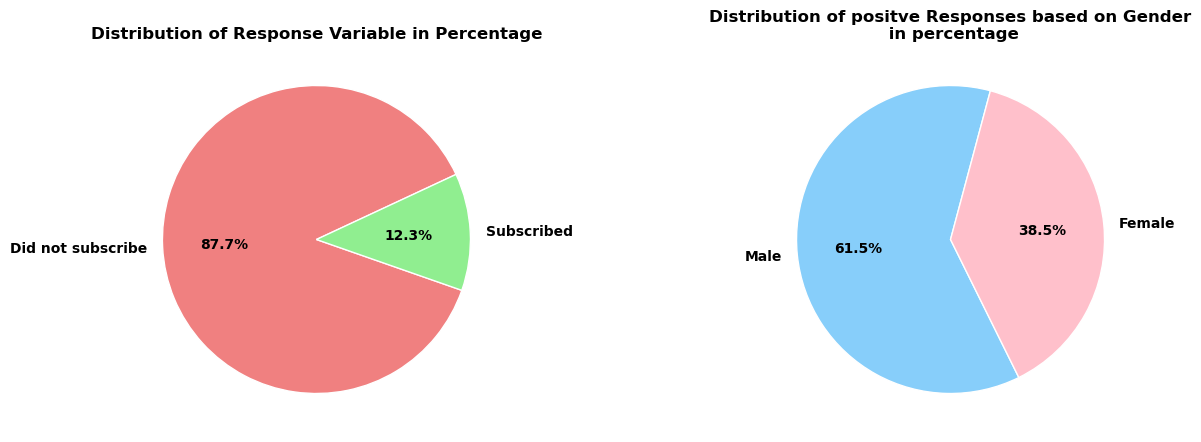

In [10]:
# Creating Subplots
figure, axes = plt.subplots(1, 2, figsize = (15,5))
plt.subplots_adjust(wspace=0.2)

# 1. Distribution of Response variable 
chart_data = (df.Response.value_counts()/df.shape[0]*100)
axes[0].pie(chart_data,labels = ['Did not subscribe', 'Subscribed'],  colors = ['lightcoral' , 'lightgreen'] , wedgeprops = dict(edgecolor ='white'),\
            startangle = 25,autopct='%1.1f%%')
axes[0].set_title('Distribution of Response Variable in Percentage')

# 2. Distribution of positve Responses based on Gender
gender_data = (df.Gender[df.Response == 1].value_counts()/df.shape[0])*100
axes[1].pie(gender_data,labels = ['Male', 'Female'],  colors = ['lightskyblue' , 'pink'] , wedgeprops = dict(edgecolor ='white'), autopct='%1.1f%%',\
           startangle = 75)
axes[1].set_title('Distribution of positve Responses based on Gender\n in percentage')

plt.show()

- From the `Distribution of the Response chart`, we can see that approximately 88% of the people did not opt for insurance, while only 12% opted for insurance. This indicates a significant class imbalance that should be addressed.

- Among the 12% of total insurance subscribers, males have a higher subscription rate with 61%, compared to females, who have around 38%.

In [11]:
# Let us create a smaller dataset with only the insure peple for analysis
insured_df = df[df['Response'] == 1]

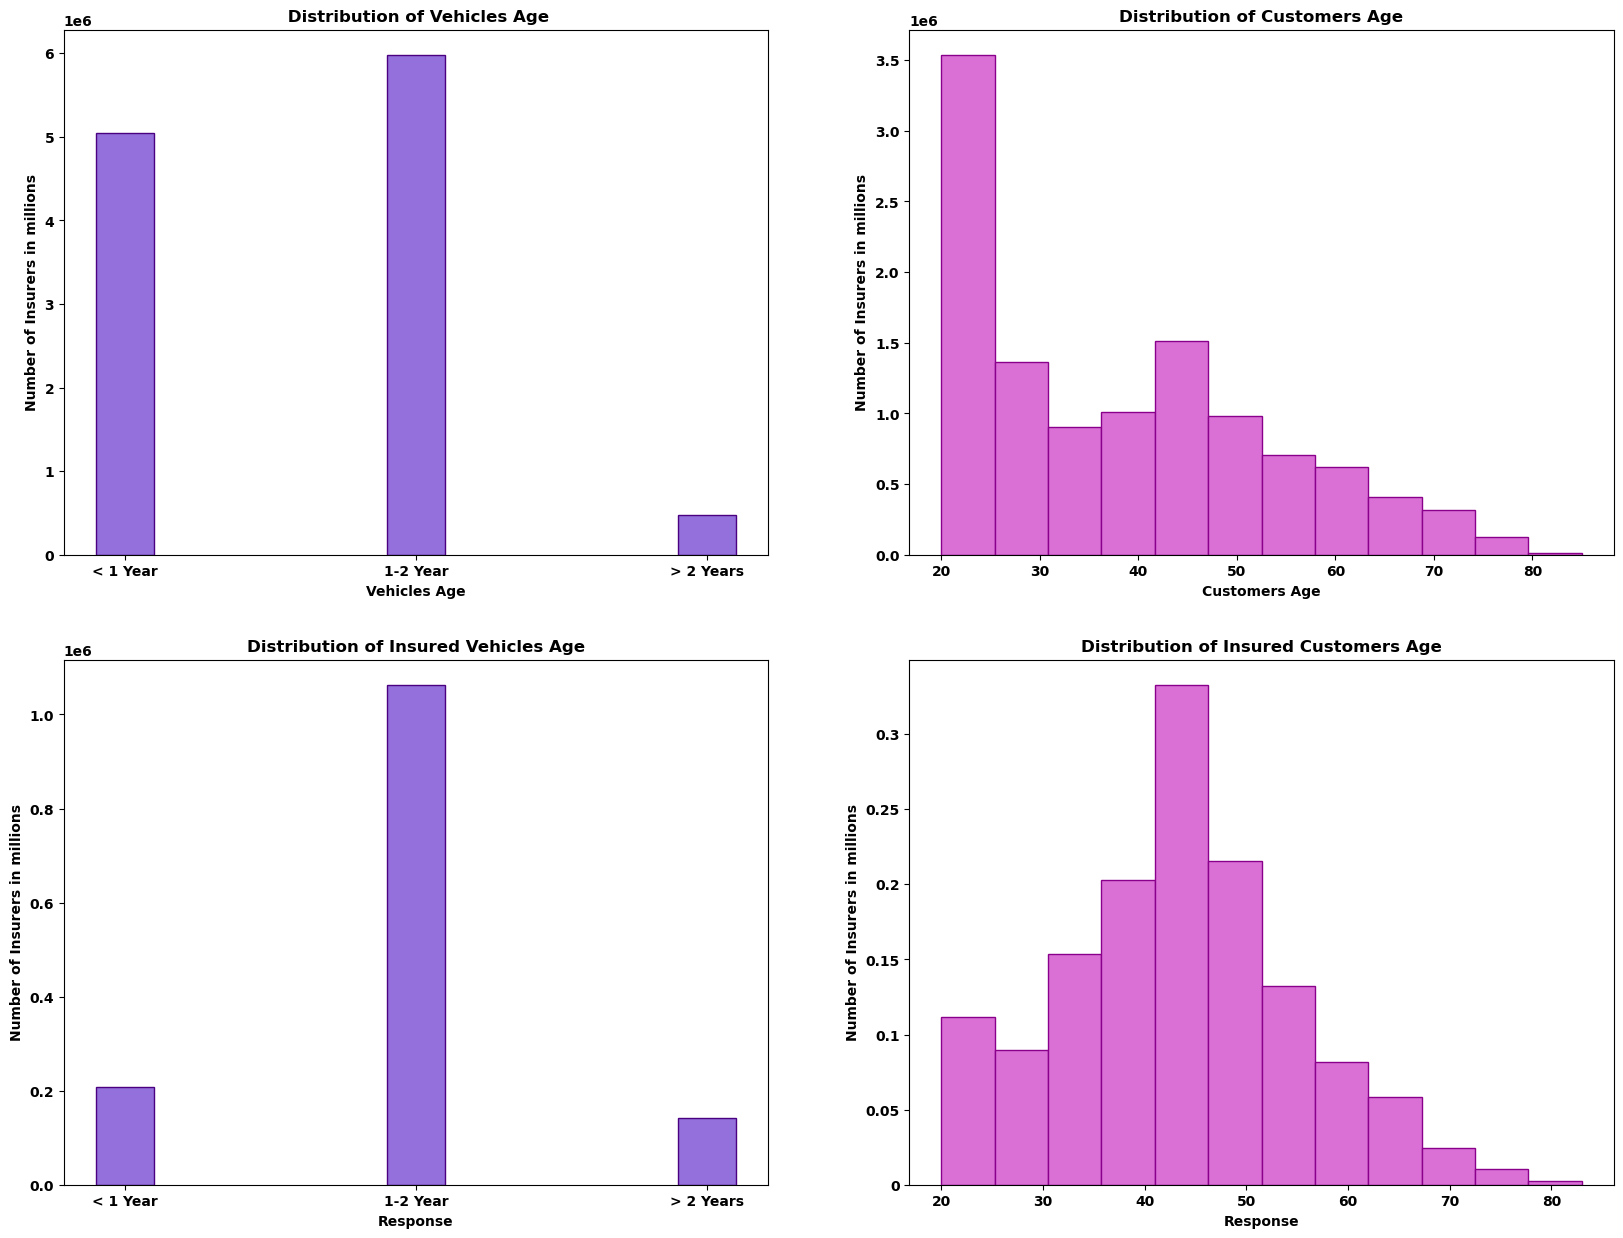

In [12]:
# Creating Subplots
figure, axes = plt.subplots(2, 2, figsize = (20,15))
plt.subplots_adjust(wspace=0.2)

# 1. Plotting Distribution of Vehicles Age
va_data = pd.DataFrame(df.Vehicle_Age.value_counts()).loc[['< 1 Year', '1-2 Year', '> 2 Years']]
axes[0,0].bar( x = va_data.index ,height = va_data['count'] ,color  = 'mediumpurple', edgecolor = 'indigo', width = 0.2)
axes[0,0].set_title(' Distribution of Vehicles Age')
axes[0,0].set_xlabel('Vehicles Age')
axes[0,0].set_ylabel('Number of Insurers in millions')

# 2. Plotting Distribution of Customers Age
axes[0,1].hist(data = df, x = 'Age' ,color  = 'orchid' , edgecolor = 'darkmagenta', bins = 12)
axes[0,1].set_title('Distribution of Customers Age')
axes[0,1].set_xlabel('Customers Age')
axes[0,1].set_ylabel('Number of Insurers in millions')

# 3. Plotting Distribution of Insured Vehicles Age
iva_data = pd.DataFrame(insured_df.Vehicle_Age.value_counts()).loc[['< 1 Year', '1-2 Year', '> 2 Years']]
axes[1,0].bar( x = iva_data.index ,height = iva_data['count'] ,color  = 'mediumpurple', edgecolor = 'indigo', width = 0.2)
axes[1,0].set_title('Distribution of Insured Vehicles Age')
axes[1,0].set_xlabel('Response')
axes[1,0].set_ylabel('Number of Insurers in millions')


# 4. Plotting Distribution of Insured Customers Age
axes[1,1].hist( data = insured_df, x = 'Age' ,color  = 'orchid' , edgecolor = 'darkmagenta' , bins = 12)
axes[1,1].set_title('Distribution of Insured Customers Age')
axes[1,1].set_xlabel('Response')
axes[1,1].set_ylabel('Number of Insurers in millions')
axes[1,1].set_yticklabels([0, 0.05 , 0.1, 0.15, 0.2, 0.25,0.3, 0.35])

plt.show()

From the charts we can infer,
- Vechichles age
    - Brand new vehicles (less than a year old) are surprisingly common, yet only a small fraction appear to be insured. This suggests a potential gap in awareness or a need for streamlined insurance options for new car owners.
    - Vehicles between 1 and 2 years old see a significant jump in insurance rates compared to brand new ones. This could indicate an inflection point where drivers become more aware of the need for insurance or their insurance requirements change.
- Customers Age
    - There is a discrepancy between the age demographics of vehicle owners and insured customers. While most vehicle owners are aged between 20 and 30 years, the majority of insured customers fall within the 34-50 age range.
    - This divergence may be due to younger drivers being less likely to fully own their vehicles or showing less concern for insurance coverage.

## 6. Data Preparation

In [13]:
# Viewing the datatypes
df.dtypes

id                        int64
Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

#### 6.1 Binary Encoding

#### 6.1.1. One-Hot Encoding

In [33]:
# Encoding the variables
# 1. Vehicle Damage
df.Vehicle_Damage = df.Vehicle_Damage.map({'Yes' : 1 , 'No' : 0})

# 2. Gender
df.Gender = df.Gender.map({'Male' : 1 , 'Female' : 0})

# Verify
df.head()

#### 6.1.2. Ordinal Encoding

In [24]:
# 3. Vehicle Age

# Importing Libraries
from sklearn.preprocessing import OrdinalEncoder

# Creating instance for Ordinal Encoder
enc = OrdinalEncoder(categories=[['< 1 Year', '1-2 Year', '> 2 Years']])

# Fitting and Transforming the column
df.Vehicle_Age = enc.fit_transform(df[['Vehicle_Age']])

# Verify
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,1,21,1,35.00,0,1.00,Yes,65101.00,124.00,187,0
1,1,1,43,1,28.00,0,2.00,Yes,58911.00,26.00,288,1
2,2,0,25,1,14.00,1,0.00,No,38043.00,152.00,254,0
3,3,0,35,1,1.00,0,1.00,Yes,2630.00,156.00,76,0
4,4,0,36,1,15.00,1,1.00,No,31951.00,152.00,294,0


#### 6.2. Splitting the Train and Test data

In [61]:
df.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [65]:
# Importing libraries
from sklearn.model_selection import train_test_split

# Splitting the data
X = df[['Gender', 'Age', 'Driving_License', 'Region_Code','Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage']]
y = df.Response
X_train ,X_test , y_train, y_test = train_test_split(X, y, test_size = 0.25 , random_state = 7)

# Verify
print('Train Size : ')
print('X :', X_train.shape , '\ny :' , y_train.shape, '\n\n')
print('Test Size : ')
print('X :', X_test.shape , '\ny :' , y_test.shape)

Train Size : 
X : (8628598, 10) 
y : (8628598,) 


Test Size : 
X : (2876200, 10) 
y : (2876200,)


#### 6.3. Addressing Class Imbalance - SMOTE

In [56]:
# Viewing the Class Imbalance
round(Train.Response.value_counts()/Train.shape[0]*100 , 2)

Response
0   87.70
1   12.30
Name: count, dtype: float64

We observed a significant class imbalance, with `Class 0 comprising over 88%` of the data and `Class 1 making up only 12%`. To address this imbalance, we will use a sampling method.

Given the large dataset and the significant number of data points in Class 1, `SMOTE` (Synthetic Minority Over-sampling Technique) is ideal. It generates synthetic samples for the minority class, maintaining the full dataset size and avoiding loss of valuable majority class data. This method helps achieve a balanced dataset and enhances model performance without reducing data richness.

In [67]:
# Importing libraries
from collections import Counter
from imblearn.over_sampling import SMOTE

# Counting the Class values before sampling
counter = Counter(y_train)
print('Before Sampling' , counter)

# Initializing smote 
smt = SMOTE()

# Fitting smote

X_train_smt, y_train_smt = smt.fit_resample(X_train , y_train)

# Counting the Class values after sampling
counter = Counter(y_train_smt)
print('After Sampling' , counter)

Before Sampling Counter({0: 7567262, 1: 1061336})
After Sampling Counter({0: 7567262, 1: 1061336})


#### 6.4. Feature Scaling - Standardization

While examining the data, we observed that there are variables with values in two digits, such as Age and Region_Code, and variables such as AnnualPremium that are in thousands and lakhs. This discrepancy can lead to impartiality in the data. Therefore, we should scale them using the standardization method to ensure fair treatment of all variables.

In [74]:
# Importing libraries
from sklearn.preprocessing import StandardScaler

# Initiating the method
scaler = StandardScaler()

# Creating a list of variables to be scaled
scaler_var = ['Age' ,'Region_Code' , 'Annual_Premium' ,'Policy_Sales_Channel' , 'Vintage']

# Scaling variables
X_train_smt[scaler_var] = scaler.fit_transform(X_train_smt[scaler_var])

# Verify
X_train_smt.describe()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
count,15134524.00,15134524.00,15134524.00,15134524.00,15134524.00,15134524.00,15134524.00,15134524.00,15134524.00,15134524.00
mean,0.48,-0.00,1.00,-0.00,0.26,0.76,0.70,-0.00,-0.00,0.00
std,0.50,1.00,0.04,1.00,0.44,0.55,0.46,1.00,1.00,1.00
min,0.00,-1.50,0.00,-2.21,0.00,0.00,0.00,-1.67,-1.82,-1.92
25%,0.00,-0.98,1.00,-0.71,0.00,0.00,0.00,-0.33,-1.38,-0.80
50%,0.00,0.06,1.00,0.12,0.00,1.00,1.00,0.10,0.38,0.03
75%,1.00,0.65,1.00,0.48,1.00,1.00,1.00,0.57,0.88,0.84
max,1.00,3.32,1.00,2.11,1.00,2.00,1.00,29.95,1.08,1.72


#### 6.4.  Correlation check

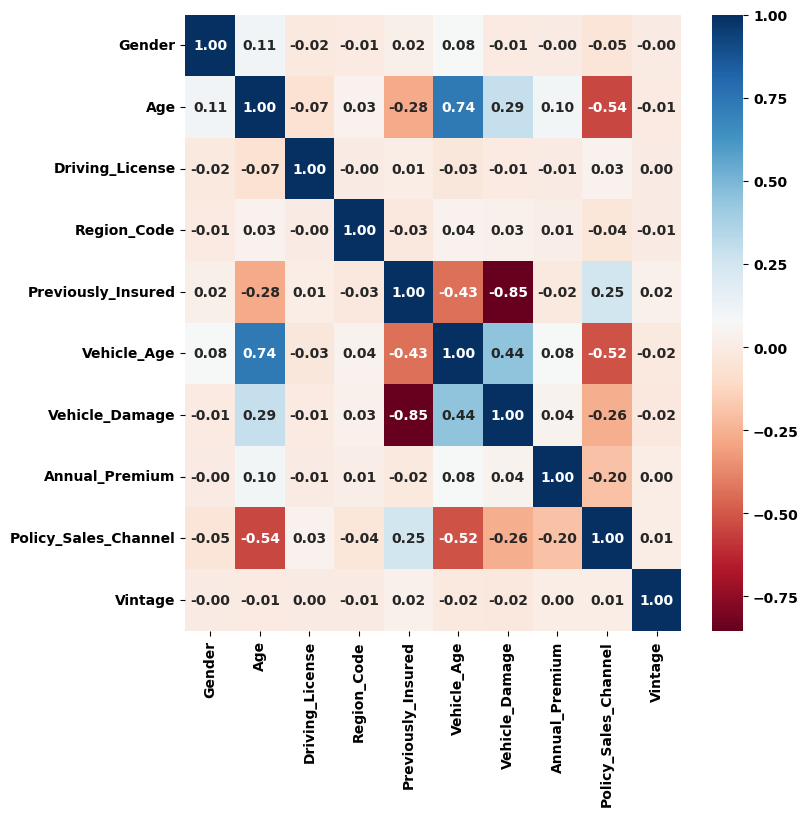

In [77]:
# Viewing the correlation among the variables
plt.figure(figsize = (8 , 8))
sns.heatmap(X_train_smt.corr(), cmap = 'RdBu' , annot = True, fmt = '.2f')
plt.show()

We observe higher correlations among variables such as `Vehicle Damage and Previously Insured`, `Age and Vehicle Age`, and `Age and Policy Sales Channel`. To address potential multicollinearity, we may need to drop some columns. However, since we are not yet certain of each variable's importance, we will first create a model using all features. Based on the statistical analysis of this initial model, we can identify and remove less important variables to refine our dataset.

## 7. Building the Model

In [85]:
# Importing libraries
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score, accuracy_score , confusion_matrix, classification_report

In [89]:
# Creating a model with all the featurs on statsmodels

# Adding constant
X_train = sm.add_constant(X_train_smt)
y_train = y_train_smt

# Fitting the model
logistic_model = sm.GLM(y_train, X_train , family = sm.families.Binomial())
m1 = logistic_model.fit()

# Viewing summary
m1.summary

MemoryError: Unable to allocate 115. MiB for an array with shape (15134524,) and data type float64

In [ ]:
vif = pd.DataFrame()
vif['Features'] = X_train_smt.columns
vif['VIF'] = [variance_inflation_factor(X_tra)]